# Plots current over time for a Series RLC Circuit


Made by Jose C.

Reference: "Pulsed Power RLC Circuit Model" by  Rishabh Datta, MIT, 17 Feb 2022

Last updated: 3/29/2022

Input

In [2]:
import numpy as np

# Inductance in Henries
L = 530e-9               

# Capacitance in Farads
C = 240e-9       

# Resistance in Ohms
R = 1.5     

# Initial Current in Amps (usually zero)
i_0 = 0         

# Initial Voltage across Capacitor in Volts (Keep Negative to have positive current)
v_0 = -25e3             

Analytical Solution

In [3]:
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


damp = R*R*C/(4*L)                # unitless term to dictate whether the system is under, over, or critically damped
gamma = R/(2*L)                   # in 1/sec    # damping coefficient
omega_0 = np.sqrt(1/(L*C))        # in 1/sec    # natural frequency

if np.isclose(damp, 1):
    # critically damped
    def Analytical(t):
        return -v_0*t* math.exp(-gamma*t) /L
    t_r = 1/gamma   # in sec
    d = 'critically damped'
if damp > 1 and not np.isclose(damp, 1):
    # overdamped
    omega = math.sqrt(gamma**2 - omega_0**2)     # Rise Time in 1/sec
    def Analytical(t):
        return -v_0* math.exp(-gamma*t) * math.sinh(omega*t)/(L*omega)
    t_r = 1*math.log((gamma+omega)/(gamma-omega))/(2*omega)    # in sec
    d = 'overdamped'
if damp < 1 and not np.isclose(damp, 1):
    # underdamped
    omega = math.sqrt(omega_0**2 - gamma**2)   # Rise Time in 1/sec
    def Analytical(t):
        return -v_0* math.exp(-gamma*t) * math.sin(omega*t)/(L*omega)
    t_r = math.atan(omega/gamma) / omega      # Rise Time in sec
    d = 'underdamped'
    
i_peak = Analytical(t_r) * 10**(-6)    # in MegaAmps
t1 = np.linspace(0,10*t_r, 200)        # region of time axis. 0 to 10 rise times utilizing 200 points
f = np.vectorize(Analytical)           # Needed to plot function

Numerical Solution

In [4]:
from scipy.integrate import odeint

def Numerical(y,t,R,L,C):
    '''
    Function utilized for scipy odeint solver
    Input:
        y: vector utilized for the differential equation. In this case, it is vector (charge, current)
        t: Time in seconds
        R: Resistance in Ohms
        L: Inductance in Henrys
        C: Capacitance in Farads
    Output:
        dydt:  vector of the derivative of y with respect to time. In this case, it is (current, ODE for system)
    '''
    q,I = y
    dydt = [I, -R*I/L - q/(L*C)]
    return dydt

y_0 = [C*v_0, 0] # initial conditions
sol = odeint(Numerical,y_0,t1,args=(R,L,C)) # Solution to ODE

Output

The Resistance is 1.5 Ohms.
The Inductance is 5.3e-07 Henries.
The Capacitance is 2.4e-07 Farads.
The damping coefficient is 1415094.3396226414 Hertz.
The Natural Frequency is 2803860.7704602215 Hertz.
The angular frequency of the system (omega) is 2420566.7167202285 Hertz.
Rise Time is 4.303817606968567e-07 Seconds.
Peak current is 0.009149744814997071 MegaAmps.
The system is underdamped.


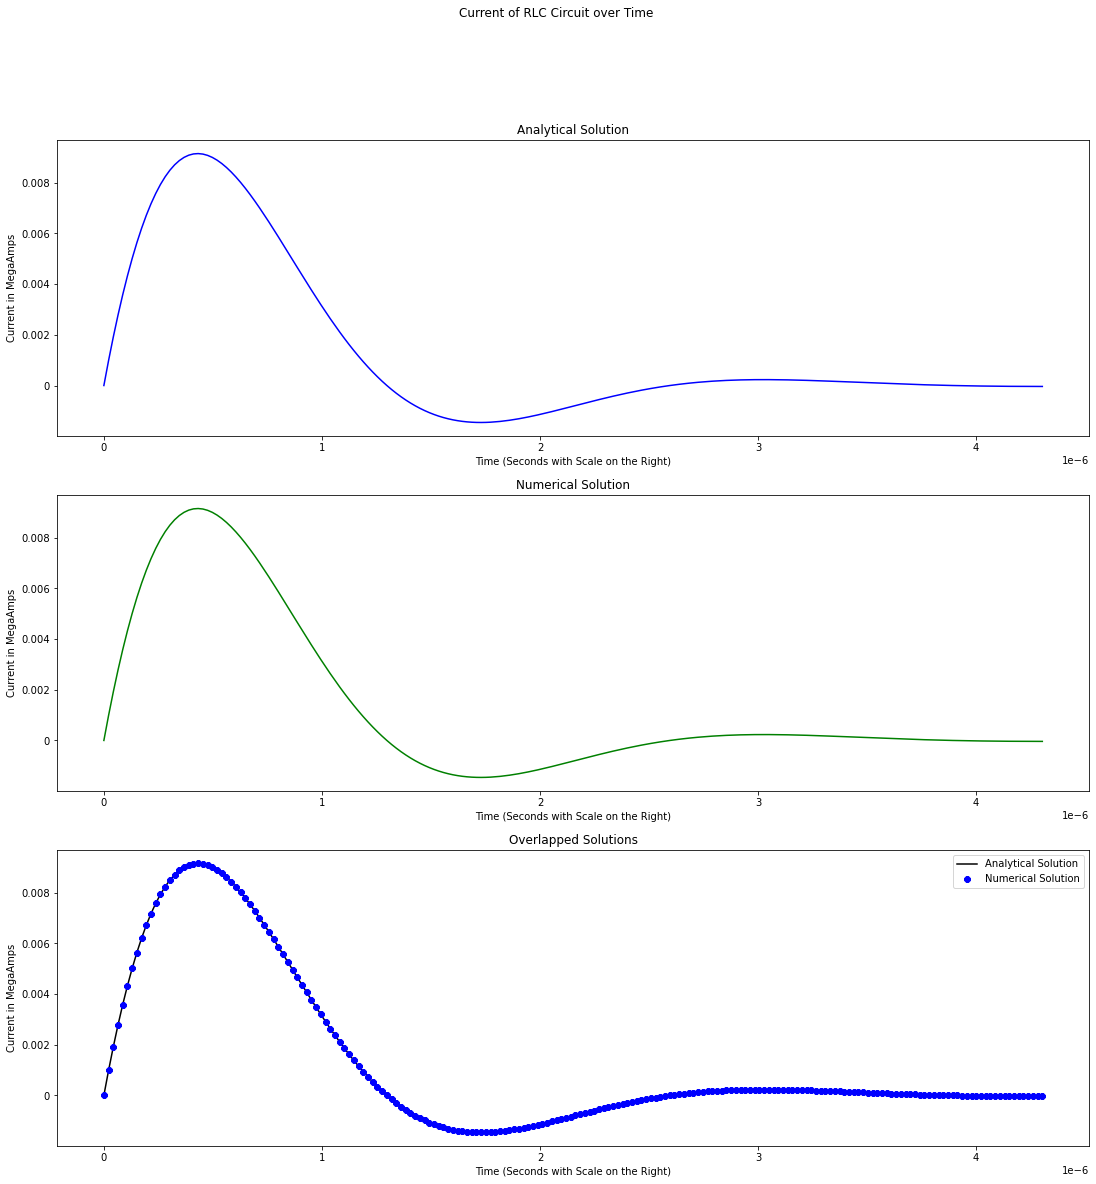

In [6]:
print('The Resistance is ' + str(R) + ' Ohms.')
print('The Inductance is ' + str(L) + ' Henries.')
print('The Capacitance is ' + str(C) + ' Farads.')
print('The damping coefficient is ' + str(gamma) + ' Hertz.')
print('The Natural Frequency is ' + str(omega_0) + ' Hertz.')
print('The angular frequency of the system (omega) is ' + str(omega) + ' Hertz.')
print('Rise Time is ' + str(t_r) + ' Seconds.')
print('Peak current is ' + str(i_peak) + ' MegaAmps.')
print('The system is ' + d + '.')

fig, axs = plt.subplots(3)
plt.suptitle('Current of RLC Circuit over Time')

axs[0].set_title('Analytical Solution')
axs[0].plot(t1,f(t1),'b')

axs[1].set_title('Numerical Solution')
axs[1].plot(t1, sol[:,1],'g')

axs[2].set_title('Overlapped Solutions')
axs[2].plot(t1,f(t1),'black', t1, sol[:,1], 'b8')
axs[2].legend(['Analytical Solution', 'Numerical Solution'])

for ax in axs.flat:
    ax.set(xlabel='Time (Seconds with Scale on the Right)', ylabel='Current in MegaAmps')
    ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/(1e6))) # Plots current in MegaAmps
    ax.yaxis.set_major_formatter(ticks_y)
fig.set_size_inches(18.5, 18.5)


plt.show()